In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import*
import datetime
import warnings
warnings.filterwarnings("ignore")

In [14]:
df=pd.read_csv("D:/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [19]:
df.isnull().sum().sum()

0

In [20]:
df.duplicated().sum()

0

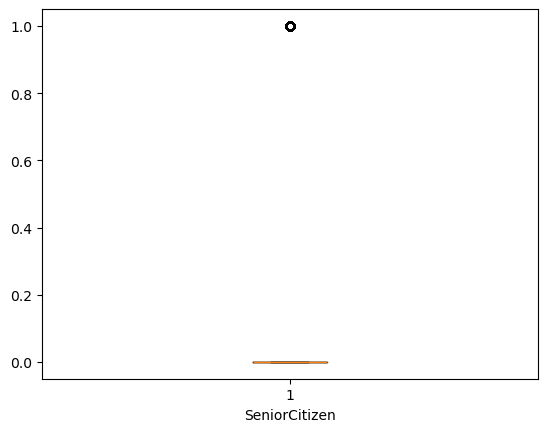

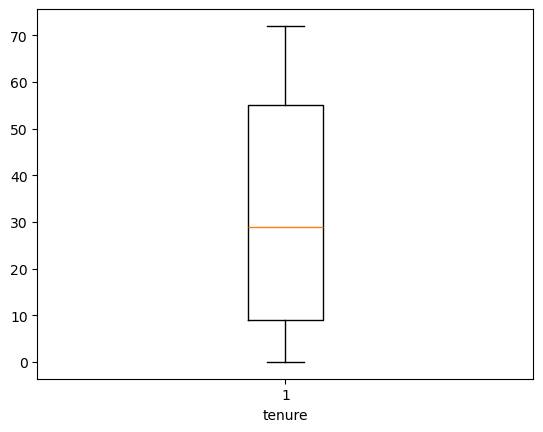

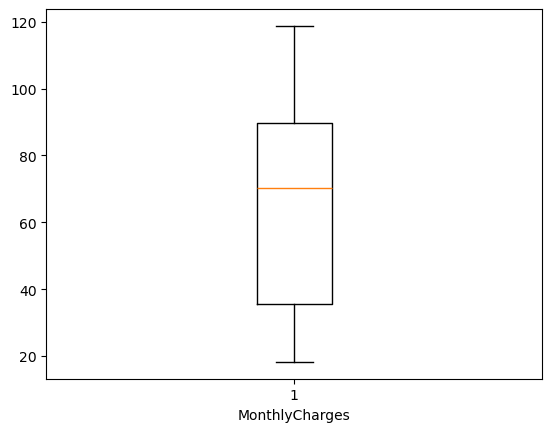

In [21]:
for i in df.columns:
    if(df[i].dtypes!="object"):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

In [22]:
df["MonthlyCharges"].value_counts()

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

In [23]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [24]:
df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [91]:
l1=df["InternetService"].value_counts()

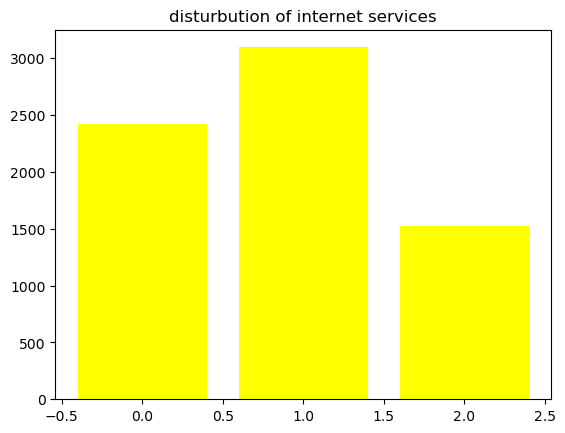

In [92]:
plt.bar(l1.index,l1.values,label="InternetService",color="yellow")
plt.title("disturbution of internet services")
plt.show()

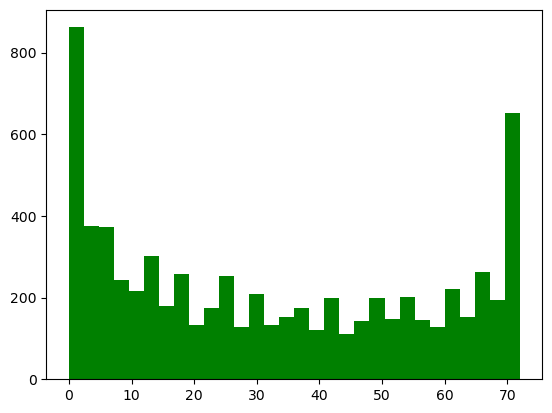

In [94]:
plt.hist(df["tenure"],bins=30,color="green")
plt.show()

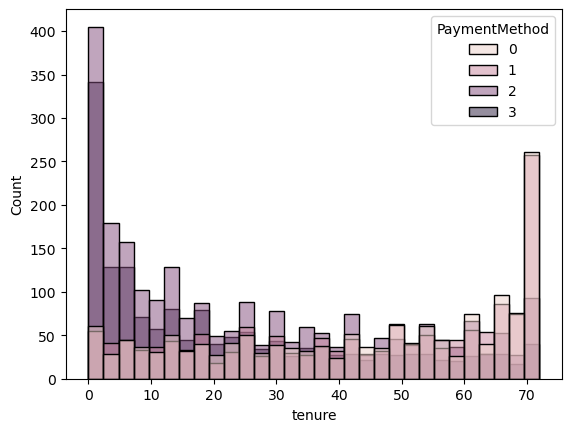

In [101]:
sns.histplot(x=df["tenure"],bins=30,color="purple",hue=df["PaymentMethod"])
plt.show()

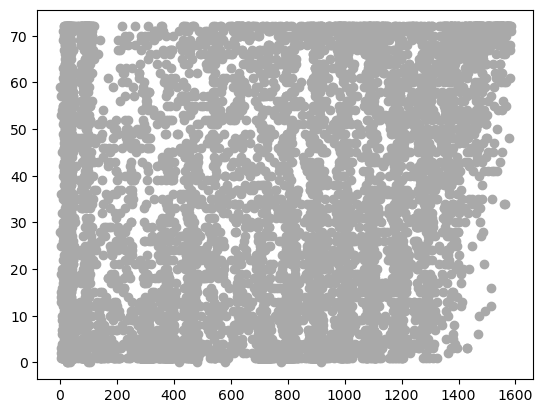

In [104]:
plt.scatter(x="MonthlyCharges",y="tenure",data=df,color="darkgray")
plt.show()

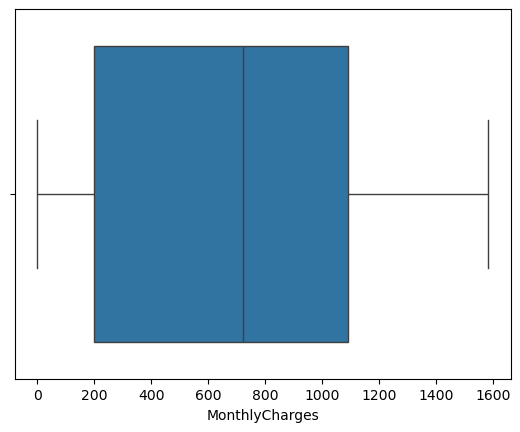

In [98]:
sns.boxplot(x="MonthlyCharges",data=df)
plt.show()

In [51]:
le=LabelEncoder()

In [52]:
col_list=df.select_dtypes(include="object")
for i in df.columns:
    df[i]=le.fit_transform(df[i])

In [134]:
x=df.drop(["Churn"],axis=1)
y=df["Churn"]

In [56]:
x,y

(      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
 0           5375       0              0        1           0       1   
 1           3962       1              0        0           0      34   
 2           2564       1              0        0           0       2   
 3           5535       1              0        0           0      45   
 4           6511       0              0        0           0       2   
 ...          ...     ...            ...      ...         ...     ...   
 7038        4853       1              0        1           1      24   
 7039        1525       0              0        1           1      72   
 7040        3367       0              0        1           1      11   
 7041        5934       1              1        1           0       4   
 7042        2226       1              0        0           0      66   
 
       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
 0                0              1                0

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [136]:
x_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,2956,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,625,610
1623,4287,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,1230,4319
6074,2674,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,62,1940
1362,1756,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,719,2012
6754,1906,1,0,0,1,0,1,2,0,2,2,0,2,0,0,2,1,0,579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,468,1,0,1,0,1,1,0,1,2,0,0,0,2,2,0,1,2,1188,6440
5191,4242,0,0,1,1,23,1,2,0,2,2,2,2,2,2,2,1,1,1115,1819
5226,5711,1,0,1,1,12,1,0,2,1,1,1,1,1,1,0,1,2,52,2659
5390,5281,1,1,0,0,12,1,2,1,0,0,2,0,2,2,0,1,2,1270,370


In [137]:
y_test

185     1
2715    0
3825    0
1807    1
132     0
       ..
6366    0
315     0
2439    0
5002    0
1161    1
Name: Churn, Length: 1409, dtype: int32

In [138]:
le=LinearRegression()

In [139]:
le.fit(x_train,y_train)

LinearRegression()

In [140]:
y_pred=le.predict(x_test)
y_pred

array([ 0.55364146,  0.15125677, -0.09650133, ...,  0.08497277,
        0.02262858,  0.46395065])

In [67]:
print(r2_score(y_pred,y_test))

-1.5239960159364885


In [78]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.371143473037594

In [150]:
y=df["Churn"]
x=df[["MonthlyCharges"]]

In [146]:
le=LogisticRegression()

In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [153]:
x_train

,MonthlyCharges
2142,625
1623,1230
6074,62
1362,719
6754,579
...,...
3772,1188
5191,1115
5226,52
5390,1270


In [154]:
le.fit(x_train,y_train)

LogisticRegression()

In [155]:
y_pr=le.predict(x_test)

In [156]:
y_pr

array([0, 0, 0, ..., 0, 0, 0])

In [157]:
r2_score(y_pred,y_test)

-1.5239960159364885

In [160]:
confusion_matrix(y_test,y_pr)

array([[1036,    0],
       [ 373,    0]], dtype=int64)

In [161]:
x=df.drop(["Churn"],axis=1)
y=df["Churn"]

In [162]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [163]:
rn=RandomForestClassifier()

In [164]:
rn.fit(x_train,y_train)

RandomForestClassifier()

In [165]:
y_predd=rn.predict(x_test)

In [166]:
y_predd

array([1, 0, 0, ..., 0, 0, 1])

In [167]:
r2_score(y_predd,y_test)

-0.2891206683324501

In [168]:
confusion_matrix(y_test,y_predd)

array([[937,  99],
       [191, 182]], dtype=int64)

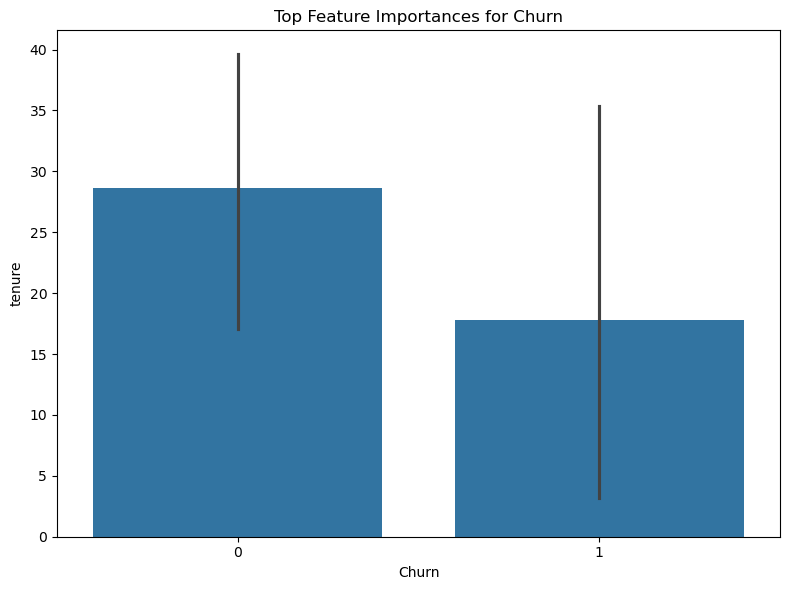

In [171]:
top_n = 15
plt.figure(figsize=(8, 6))
sns.barplot(data=df.head(top_n), x="Churn", y="tenure")
plt.title("Top Feature Importances for Churn")
plt.tight_layout()
plt.show()

In [176]:
top3 = df.head(3)["tenure"].tolist()
top3

[1, 34, 2]

In [181]:
important=["Contract", "MonthlyCharges", "tenure"]

for i in important:
    if i in df.columns:
        print(f"\nChurn rate by {i}:")
        print(df.groupby(i)["Churn"].mean().sort_values(ascending=False))


Churn rate by Contract:
Contract
0    0.427097
1    0.112695
2    0.028319
Name: Churn, dtype: float64

Churn rate by MonthlyCharges:
MonthlyCharges
1250    1.0
347     1.0
1300    1.0
150     1.0
1447    1.0
       ... 
617     0.0
618     0.0
619     0.0
620     0.0
1584    0.0
Name: Churn, Length: 1585, dtype: float64

Churn rate by tenure:
tenure
1     0.619902
2     0.516807
5     0.481203
4     0.471591
3     0.470000
        ...   
63    0.055556
64    0.050000
71    0.035294
72    0.016575
0     0.000000
Name: Churn, Length: 73, dtype: float64
